In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
test_type = 'elec'
thres = 52
base_path = f'[USER_PATH]\\ArtificialVision'

data_path = os.path.join(base_path, 'data')
opinion_df = pd.read_csv(os.path.join(data_path, 'OpinionsVer2.csv')).fillna(0)
if test_type == 'opt':
    opinion_df = pd.concat([opinion_df.iloc[:thres, :], opinion_df.iloc[-1, :].to_frame().transpose()], axis=0)
elif test_type == 'elec': 
    opinion_df = opinion_df.iloc[thres:-1, :]
opinion_df = opinion_df.reset_index()

opinion_df.tail()

,index,Human subject ID,Subjective opinion (Korean),Subjective opinion (English – Papago translation),Level of Difficulty,Focused Facial Features
20,72,0.0,저해상도 중 픽셀같은 가진은 뭘 찍어야 할지 성별도 전혀 모르겠고 감이 안 온다.,"Among low-resolution pixels, Ga-in, like pixel...",0,0
21,73,0.0,문제가 너무 많다.,There are too many problems.,0,0
22,74,0.0,"앞머리 모양, 얼굴형을 중심적으로 봤다.",I focused on the shape of my bangs and face.,0,0
23,75,609.0,"어려운건 엄청 어렵고, 알아볼만한건 알아볼 수 있었다. 머리, 얼굴 외곽 및 눈코입...","It's hard, it's hard, it's recognizable. It wa...",It was either hardly or fully recognizable.,"I recognized the face by looking at the head, ..."
24,76,610.0,"사람마다 갖는 특징 (앞머리, 귀, 입모양, 콧볼 크기, 눈썹 등)을 기억했다가 찾...",I tried to remember and find the characteristi...,It was difficult to find similar faces because...,I tried to remember and recognize the faces wi...


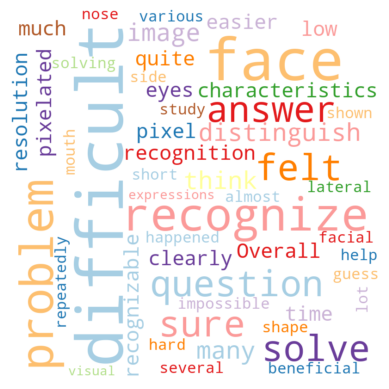

In [6]:
sel_col = 'Level of Difficulty'

text = ''
for i in range(opinion_df.shape[0]):
    text += opinion_df[sel_col].astype(str)[i]

wordcloud = WordCloud(width=800,
                      height=800,
                      max_words=50,
                      stopwords=list(STOPWORDS) + ['000Very', '0000Quite', '00The', '00It', 'even', 'etc', 'take', 'case', 't', 'm', 'will', 'given', 'whenever'],
                      background_color='white',
                      colormap='Paired').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

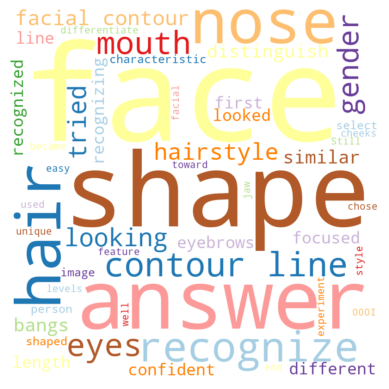

In [7]:
sel_col = 'Focused Facial Features'

text = ''
for i in range(opinion_df.shape[0]):
    text += opinion_df[sel_col].astype(str)[i]

wordcloud = WordCloud(width=800,
                      height=800,
                      max_words=50,
                      stopwords=list(STOPWORDS) + ['vs', '000000I', '000Very', '0000Quite', '00The', '00It', 'see', 'even', 'etc', 'take', 'case', 't', 'm', 'will', 'given', 'whenever', 'overall', 'quite', 'much', 'sure', 'several'],
                      background_color='white',
                      colormap='Paired').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()